In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
# Always make it pretty.
plt.style.use('ggplot')
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup
import datetime

In [22]:
file = pd.read_csv('data/Collisions.csv')

In [23]:
infl = file[((file['UNDERINFL'] == 'Y') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['FATALITIES'] > 0))].shape[0]
drunkdracc = file[((file['UNDERINFL'] == 'Y') | (file['UNDERINFL'] == '1'))].shape[0]
print('percentage of drunk driving accidents that result in a death: ',(100*infl/drunkdracc))

nondrunkdrivingacccsdeath = file[((file['UNDERINFL'] == 'N') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['FATALITIES'] > 0))].shape[0]
nondrunkdrivingacc = file[(file['UNDERINFL'] == 'N') | (file['UNDERINFL'] == '0')].shape[0]
print('percentage of NON-drunk driving accidents that result in a death: ',(100*nondrunkdrivingacccsdeath/nondrunkdrivingacc))


percentage of drunk driving accidents that result in a death:  0.966183574879227
percentage of NON-drunk driving accidents that result in a death:  0.12671202018381691


In [24]:
seriousinjury = file[((file['UNDERINFL'] == 'Y') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('percentage of drunk driving accidents that result in serioius injuries: ',100*seriousinjury/drunkdracc)

seriousinjurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('percentage of NON-drunk driving accidents that result in serious injuries: ',100* seriousinjurynondrunk/nondrunkdrivingacc)

percentage of drunk driving accidents that result in serioius injuries:  4.487385936661299
percentage of NON-drunk driving accidents that result in serious injuries:  1.4276220940710038


In [25]:
injurydrunk = file[((file['UNDERINFL'] == 'Y') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['INJURIES'] > 0))].shape[0]
injurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['INJURIES'] > 0))].shape[0]
print('percentage of drunk driving accidents that result in injuries',injurydrunk/drunkdracc*100)
print('percentage of NON-drunk driving accidents that result in injuries',injurynondrunk/nondrunkdrivingacc*100)

percentage of drunk driving accidents that result in injuries 41.82501341921632
percentage of NON-drunk driving accidents that result in injuries 30.51563344746801


In [26]:
file['ST_COLCODE'] = pd.to_numeric(file['ST_COLCODE'],errors = 'coerce')
pedestrianfatalties = ((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
nonpedestrianfatalities = ((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 10)).sum()
fatalities = (file['FATALITIES'] > 0).sum()
print('percentage of fatalities that involve a pedestrian: ',pedestrianfatalties/fatalities*100)

pedstrianserious = ((file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
serioustotal = (file['SERIOUSINJURIES'] > 0).sum()
print('percentage of serious injuries that involve a pedestrian: ',pedstrianserious/serioustotal*100)

pedestrianinjuries =((file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
injuriestotal = (file['INJURIES'] > 0).sum()
print('percentage of injuries that involve a pedestrian: ',pedestrianinjuries/injuriestotal*100)

percentage of fatalities that involve a pedestrian:  35.0609756098
percentage of serious injuries that involve a pedestrian:  28.1895093063
percentage of injuries that involve a pedestrian:  11.3598435683


In [27]:
file2 = file.copy()

In [9]:
file2.to_pickle('data/CollionsWDatetime.pkl.bz2', compression = 'bz2')

In [30]:
def datetimeconversion(row):
    try:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y %I:%M:%S %p')
    except:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y')

In [31]:
file2['INCDTTM']=file2.apply(datetimeconversion, axis=1)

In [32]:
def getweather():
    url = 'https://api.darksky.net/forecast/'
    with open('data/dark_sky.txt', 'r') as file:
        key = file.read()
    latlong = '/47.44472,-122.31361,'
    for i in range(5683): #5682 is number of days from beg to end
        time = 1389346020 + (i*24*60*60)
        strtime = str(time)
        finalurl= url+key+latlong+strtime
        r = requests.get(finalurl)
        dic = json.loads(r.content)
        Weather.insert_one(dic)
 
    

In [33]:
from pymongo import MongoClient
import pprint

In [34]:
client = MongoClient('localhost', 27017)
db = client['WeatherDB']
Weather = db['Weather']

In [35]:
Weather.find_one()

{'_id': ObjectId('5d781b8d4cadcc23e8d2595a'),
 'currently': {'apparentTemperature': 41.78,
  'cloudCover': 0.75,
  'dewPoint': 42.8,
  'humidity': 0.9,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1012.59,
  'summary': 'Mostly Cloudy',
  'temperature': 45.55,
  'time': 1389346020,
  'uvIndex': 0,
  'visibility': 10,
  'windBearing': 202,
  'windGust': 15.46,
  'windSpeed': 7.1},
 'daily': {'data': [{'apparentTemperatureHigh': 46.95,
    'apparentTemperatureHighTime': 1389394800,
    'apparentTemperatureLow': 39.39,
    'apparentTemperatureLowTime': 1389456000,
    'apparentTemperatureMax': 51.81,
    'apparentTemperatureMaxTime': 1389423600,
    'apparentTemperatureMin': 41.71,
    'apparentTemperatureMinTime': 1389348000,
    'cloudCover': 0.96,
    'dewPoint': 42.57,
    'humidity': 0.85,
    'icon': 'rain',
    'moonPhase': 0.35,
    'precipIntensity': 0.0048,
    'precipIntensityMax': 0.03,
    'precipIntensityMaxTime': 1389409200

In [36]:
def getprecipitation(info):
    times = info.find({})
    info = dict()
    for time in times:
        for i in range(len(time['hourly']['data'])):
            t = time['hourly']['data'][i]['time']
            try: 
                rain = time['hourly']['data'][i]['precipIntensity']
            except:
                continue
            dt = datetime.datetime.utcfromtimestamp(t)-datetime.timedelta(hours=8)
            info[dt] = rain
    return info

In [37]:
rain = getprecipitation(Weather)
rainpd = pd.DataFrame.from_dict(rain, orient='index')

In [38]:
def getnorainlist(df,num):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] == 0:
            count += 1
        if df.iloc[i,0] != 0:
            if count >= num:
                lst.append(index)
            count = 0
    return lst
def getrainlist(df,num,level):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] > level:
            count += 1
        if df.iloc[i,0] <= level:
            if count >= num:
                lst.append(index)
            count = 0
    return lst

In [39]:
thirtysixhourlst = getnorainlist(rainpd,7)

In [245]:
len(thirtysixhourlst)
seriousrain = getrainlist(rainpd,1,.1)
len(seriousrain)

92

In [41]:
fourhourswetaccidentlst = getrainlist(rainpd,4,0)

In [42]:
fourOonehoursweaccidentlst = getrainlist(rainpd,4,.03)

In [205]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [206]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [188]:
def getaccidentdict(df,lst,timeback):
    diction = dict() 
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        time = i.to_pydatetime()
        timebefore = time - datetime.timedelta(hours=timeback)
        timeafter =  time - datetime.timedelta(hours=timeback+1)
        accidents = sum((file2['INCDTTM'] > timeafter) & (file2['INCDTTM'] <= timebefore))
        if accidents > 0:
            diction[time] = accidents
    return diction

def severitywetaccidentsdict(df,lst,kind,timeback):
    diction = dict()
    dictionary = dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        time = i.to_pydatetime()
        timebefore = time - datetime.timedelta(hours=timeback)
        timeafter =  time - datetime.timedelta(hours=timeback + 1)
        accidents = sum((df['INCDTTM'] > timeafter) & (df['INCDTTM'] <= timebefore))
        if accidents > 0:
            diction[time] = accidents
            count =  sum(df[(df['INCDTTM']> timeafter) & (df['INCDTTM']<= timebefore) & (df[kind] > 0)][kind])
            dictionary[time] = count
    return (diction, dictionary)

In [193]:
#wetfourhourinjuriesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'INJURIES',0)
#wetfourhourseriousinjuriesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'SERIOUSINJURIES',0)
#wetfourhourifatalitiesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'FATALITIES',0)

In [194]:
print('WET FOR 3 OR MORE CONSECUTIVE HOURS')
print('Regular injuries below')
print(sum(wetfourhourinjuriesdict[1].values()))
wetfourhoursinjuriesnuminjuries = list(wetfourhourinjuriesdict[1].values())
print('AVG number of regular injuries per time period:', sum(wetfourhoursinjuriesnuminjuries)/len(wetfourhourinjuriesdict[1]))
print('Serious Injuries Below')
print(sum(wetfourhourseriousinjuriesdict[1].values()))
print('Fatalities Below')
print(sum(wetfourhourifatalitiesdict[1].values()))
#wetfourhourifatalitiesdict[0].values()
#wetfourhourifatalitiesdict[1].values()

WET FOR 3 OR MORE CONSECUTIVE HOURS
Regular injuries below
328
AVG number of regular injuries per time period: 0.931818181818
Serious Injuries Below
16
Fatalities Below
0


In [195]:
#wetthirtysixhoursdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',-1)
#wetthirtysixhoursdictseriousinjury = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',-1)
#wetthirtysixhoursdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',-1)

In [198]:
print('DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
print('Regular injuries below')
print(sum(wetthirtysixhoursdict[1].values()))
wetthirtysixinjuriesnuminjuries = list(wetthirtysixhoursdict[1].values())
print('AVG number of regular injuries per time period:', sum(wetthirtysixinjuriesnuminjuries)/len(wetthirtysixinjuriesnuminjuries))
print('Serious Injuries Below')
print(sum(wetthirtysixhoursdictseriousinjury[1].values()))
print('Fatalities Below')
print(sum(wetthirtysixhoursdictfatalities[1].values()))

DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET
Regular injuries below
519
AVG number of regular injuries per time period: 1.05918367347
Serious Injuries Below
19
Fatalities Below
3


In [199]:
#drythirtysixhourdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',2)
#drythirtysixhourdictseriousinjuries = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',2)
#drythirtysixhourdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',2)

In [200]:
print('DRY FOR 5 OR MORE CONSECUTIVE HOURS')
print('Regular injuries below')
print(sum(drythirtysixhourdict[1].values()))
drythirtysixnuminjuries = list(drythirtysixhourdict[1].values())
print('AVG number of regular injuries per time period:', sum(drythirtysixnuminjuries)/len(drythirtysixnuminjuries))
print('Serious Injuries Below')
print(sum(drythirtysixhourdictseriousinjuries[1].values()))
print('Fatalities Below')
print(sum(drythirtysixhourdictfatalities[1].values()))

DRY FOR 5 OR MORE CONSECUTIVE HOURS
Regular injuries below
382
AVG number of regular injuries per time period: 0.82863340564
Serious Injuries Below
10
Fatalities Below
1


In [201]:
#wetfourOonehourinjuriesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'INJURIES',0)
#wetfourOoneseriousinjuriesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'SERIOUSINJURIES',0)
#wetfourOonehourifatalitiesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'FATALITIES',0)

In [202]:
print('WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN')
print('Regular injuries below')
print(sum(wetfourOonehourinjuriesdict[1].values()))
wetfourOonehoursinjuries = list(wetfourOonehourinjuriesdict[1].values())
print('AVG number regular injuries per time period:',sum(wetfourOonehoursinjuries)/len(wetfourOonehoursinjuries))
print('Serious Injuries Below')
print(sum(wetfourOoneseriousinjuriesdict[1].values()))
print('Fatalities Below')
print(sum(wetfourOonehourifatalitiesdict[1].values()))

WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN
Regular injuries below
98
AVG number regular injuries per time period: 1.04255319149
Serious Injuries Below
2
Fatalities Below
0


In [246]:
seriousrainhourinjuriesdict = severitywetaccidentsdict(file2,seriousrain,'INJURIES',0)
seriousrainhourseriousinjuriesdict = severitywetaccidentsdict(file2,seriousrain,'SERIOUSINJURIES',0)
seriousrainfatalitiesdict = severitywetaccidentsdict(file2,seriousrain,'FATALITIES',0)

In [247]:
print('.1 INCHES FOR 1 HOUR')
print('Regular injuries below')
print(sum(seriousrainhourinjuriesdict[1].values()))
seriousraininjuries = list(seriousrainhourinjuriesdict[1].values())
print('AVG number regular injuries per time period:',sum(seriousraininjuries)/len(seriousraininjuries))
print('Serious Injuries Below')
print(sum(seriousrainhourseriousinjuriesdict[1].values()))
print('Fatalities Below')
print(sum(seriousrainfatalitiesdict[1].values()))

.1 INCHES FOR 1 HOUR
Regular injuries below
70
AVG number regular injuries per time period: 1.09375
Serious Injuries Below
2
Fatalities Below
0


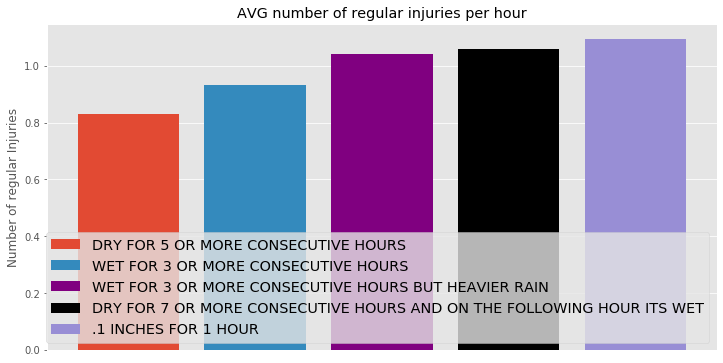

In [249]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.bar(1,(sum(drythirtysixhourdict[1].values())/len(drythirtysixhourdict[1].values())),label='DRY FOR 5 OR MORE CONSECUTIVE HOURS')
ax.bar(2,(sum(wetfourhourinjuriesdict[1].values())/len(wetfourhourinjuriesdict[1].values())),label='WET FOR 3 OR MORE CONSECUTIVE HOURS')
ax.bar(3,(sum(wetfourOonehourinjuriesdict[1].values())/len(wetfourOonehourinjuriesdict[1].values())),color='purple',label='WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVIER RAIN')
ax.bar(4,(sum(wetthirtysixhoursdict[1].values())/len(wetthirtysixhoursdict[1].values())),color='black',label='DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
ax.bar(5, np.mean(seriousraininjuries),label='.1 INCHES FOR 1 HOUR')
ax.set_title('AVG number of regular injuries per hour')
ax.set_ylabel('Number of regular Injuries')
ax.legend(loc='lower right',fontsize='x-large')
ax.get_xaxis().set_visible(False)

In [250]:
print('Null Hypothesis: .1 INCHES FOR 1 HOUR AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df9 = welch_satterhwaithe_df(seriousraininjuries,wetthirtysixinjuriesnuminjuries)
test_stat9 = welch_test_statistic(seriousraininjuries,wetthirtysixinjuriesnuminjuries)
students9 = stats.t(df9)
pvalue9 = students4.cdf(test_stat9)
print('alpha: .1')
print('pvalue:',pvalue9)
print('Must reject null')

Null Hypothesis: .1 INCHES FOR 1 HOUR AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.570551795576
Must reject null


In [207]:
print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df4 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
test_stat4 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
students4 = stats.t(df4)
pvalue4 = students4.cdf(test_stat4)
print('alpha: .1')
print('pvalue:',pvalue4)
print('Must reject null')

Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.083586727297
Must reject null


In [212]:
print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df8 = welch_satterhwaithe_df(wetfourOonehoursinjuries,wetthirtysixinjuriesnuminjuries)
test_stat8 = welch_test_statistic(wetfourOonehoursinjuries,wetthirtysixinjuriesnuminjuries)
students8 = stats.t(df8)
pvalue8 = students4.cdf(test_stat8)
print('alpha: .1')
print('pvalue:',pvalue8)
print('Cannot reject nulll')

Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.454730457059
Cannot reject nulll


In [213]:
#print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 5 OR MORE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
#df5 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
#test_stat5 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
#students5 = stats.t(df5)
#pvalue5 = students5.cdf(test_stat5)
#print('alpha: .1')
#print('pvalue:',1 - pvalue5)
#print('Cannot reject null')

In [210]:
print('Null Hypothesis: DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET AND DRY FOR 5 OR MORE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df6 = welch_satterhwaithe_df(wetthirtysixinjuriesnuminjuries,drythirtysixnuminjuries)
test_stat6 = welch_test_statistic(wetthirtysixinjuriesnuminjuries,drythirtysixnuminjuries)
students6 = stats.t(df6)
pvalue6 = 1-students6.cdf(test_stat6)
print('alpha: .1')
print('pvalue:',pvalue6)
print('Must reject null')

Null Hypothesis: DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET AND DRY FOR 5 OR MORE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.00362219189439
Must reject null


In [251]:
#fourhourswetaccidentdict = getaccidentdict(file2,fourhourswetaccidentlst,0)
#afterthirtysixhourwet = getaccidentdict(file2,thirtysixhourlst,-1)
#afterthirtysixhourdry = getaccidentdict(file2,thirtysixhourlst,2)
#fourOonehourswetaccidentdict = getaccidentdict(file2,fourOonehoursweaccidentlst,0)
#seriousrainaccidentdict = getaccidentdict(file2,seriousrain,0)

In [215]:
print('WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS')
fourhourswetacc = sum(fourhourswetaccidentdict.values())
fourhourswetvalues = fourhourswetaccidentdict.values()
fourhourswetkeys = fourhourswetaccidentdict.keys()
print('Number of Accidents below')
print(sum(fourhourswetaccidentdict.values()))
print('Number of times weather condition was met')
print(len(fourhourswetaccidentdict.values()))
print('AVG number of Accidents per time period')
print(np.mean(list(fourhourswetaccidentdict.values())))


WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS
Number of Accidents below
922
Number of times weather condition was met
360
AVG number of Accidents per time period
2.56111111111


In [216]:
print('DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
wetthirtysix = sum(afterthirtysixhourwet.values())
wetthirtysixvalues = afterthirtysixhourwet.values()
wetthirtysixkeys = afterthirtysixhourwet.keys()
print('Number of Accidents below')
print(sum(afterthirtysixhourwet.values()))
print('Number of times weather condition was met')
print(len(afterthirtysixhourwet.values()))
print('AVG number of Accidents per time period')
print(np.mean(list(afterthirtysixhourwet.values())))

DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET
Number of Accidents below
1330
Number of times weather condition was met
500
AVG number of Accidents per time period
2.66


In [217]:
print('DRY FOR 5 OR MORE HOURS')
drythirtysix = sum(afterthirtysixhourdry.values())
drythirtysixvalues = afterthirtysixhourdry.values()
drthirtysixkeys = afterthirtysixhourdry.keys()
print('Number of Accidents below')
print(sum(afterthirtysixhourdry.values()))
print('Number of times weather condition was met')
print(len(afterthirtysixhourdry.values()))
print('AVG number of Accidents per time period')
print(np.mean(list(drythirtysixvalues)))

DRY FOR 5 OR MORE HOURS
Number of Accidents below
1024
Number of times weather condition was met
477
AVG number of Accidents per time period
2.14675052411


In [236]:
print('WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN')
fourOonehourswetacc = sum(fourOonehourswetaccidentdict.values())
fourOonehourswetvalues = fourOonehourswetaccidentdict.values()
fourOonehourswetkeys = fourOonehourswetaccidentdict.keys()
print('Number of Accidents below')
print(sum(fourOonehourswetaccidentdict.values()))
print('Number of times weather condition was met')
print(len(fourOonehourswetaccidentdict.values()))
print('AVG number of Accidents per time period')
print(np.mean(list(fourOonehourswetaccidentdict.values())))

WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN
Number of Accidents below
261
Number of times weather condition was met
98
AVG number of Accidents per time period
2.66326530612


In [252]:
print('.1 INCHES FOR 1 HOUR')
seriousrainswetacc = sum(seriousrainaccidentdict.values())
seriousrainwetvalues = seriousrainaccidentdict.values()
seriousrainwetkeys = seriousrainaccidentdict.keys()
print('Number of Accidents below')
print(sum(seriousrainaccidentdict.values()))
print('Number of times weather condition was met')
print(len(seriousrainaccidentdict.values()))
print('AVG number of Accidents per time period')
print(np.mean(list(seriousrainaccidentdict.values())))



.1 RAIN FOR ONE HOUR
Number of Accidents below
175
Number of times weather condition was met
66
AVG number of Accidents per time period
2.65151515152


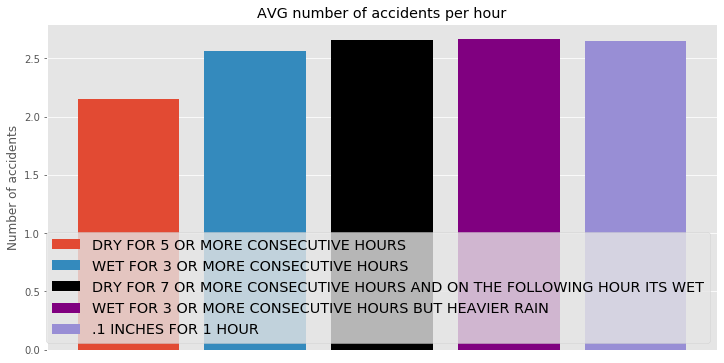

In [254]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.bar(1,sum(afterthirtysixhourdry.values())/len(afterthirtysixhourdry.values()),label='DRY FOR 5 OR MORE CONSECUTIVE HOURS')
ax.bar(2,sum(fourhourswetaccidentdict.values())/len(fourhourswetaccidentdict.values()),label='WET FOR 3 OR MORE CONSECUTIVE HOURS')
ax.bar(3,sum(afterthirtysixhourwet.values())/len(afterthirtysixhourwet.values()),color='black',label='DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
ax.bar(4,sum(fourOonehourswetaccidentdict.values())/len(fourOonehourswetaccidentdict.values()),color='purple', label='WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVIER RAIN')
ax.bar(5,np.mean(list(seriousrainwetvalues)),label='.1 INCHES FOR 1 HOUR')
ax.set_title('AVG number of accidents per hour')
ax.set_ylabel('Number of accidents')
ax.legend(loc='lower right',fontsize='x-large')
ax.get_xaxis().set_visible(False)

In [230]:
df = welch_satterhwaithe_df(list(drythirtysixvalues),list(wetthirtysixvalues))
test_stat = welch_test_statistic(list(drythirtysixvalues),list(wetthirtysixvalues))
students = stats.t(df)
pvalue = students.cdf(test_stat)
print('p-value:',pvalue,'- Reject null: dry and 7 or more hours of dry but on the following hour are not the same')

p-value: 0.00107953926049 - Reject null: dry and 7 or more hours of dry but on the following hour are not the same


In [229]:
df2 = welch_satterhwaithe_df(list(fourhourswetvalues),list(wetthirtysixvalues))
test_stat2 = welch_test_statistic(list(fourhourswetvalues),list(wetthirtysixvalues))
students2 = stats.t(df2)
pvalue2 = students2.cdf(test_stat2)
print('p-value:',pvalue2,'- Accept null: wet 3 hours and 7 or more hours of dry but on the following hour are the same')

p-value: 0.287584793383 - Accept null: wet 3 hours and 7 or more hours of dry but on the following hour are the same


In [231]:
df7 = welch_satterhwaithe_df(list(wetthirtysixvalues),list(fourOonehourswetvalues))
test_stat7 = welch_test_statistic(list(wetthirtysixvalues),list(fourOonehourswetvalues))
students7 = stats.t(df7)
pvalue7 = students7.cdf(test_stat7)
print('p-value:',pvalue7,'- Accept null: wet 3 hours of heavy rain and 7 or more hours of dry but on the following hour are the same')

p-value: 0.494248129732 - Accept null: wet 3 hours of heavy rain and 7 or more hours of dry but on the following hour are the same


In [255]:
df10 = welch_satterhwaithe_df(list(wetthirtysixvalues),list(seriousrainwetvalues))
test_stat10 = welch_test_statistic(list(wetthirtysixvalues),list(seriousrainwetvalues))
students10 = stats.t(df10)
pvalue10 = students7.cdf(test_stat10)
print('p-value:',pvalue7,'- Accept null: .1 inches for 1 hour and 7 or more hours of dry but on the following hour are the same')

p-value: 0.494248129732 - Accept null: .1 inches for 1 hour and 7 or more hours of dry but on the following hour are the same


In [52]:
def getaccidentsperhour(df):
    dic=dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in range(24):
        if i == 23:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time <= datetime.time(23,59))].shape[0]
            dic[i]=hourly
        else:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time < datetime.time(i+1,0))].shape[0]
            dic[i]=hourly
    return dic

In [53]:
hourlyaccidents = getaccidentsperhour(file2)
hourlyaccidents

{0: 3828,
 1: 3410,
 2: 3579,
 3: 1638,
 4: 1195,
 5: 1626,
 6: 3152,
 7: 6364,
 8: 8303,
 9: 7824,
 10: 7257,
 11: 7992,
 12: 10117,
 13: 9995,
 14: 10395,
 15: 11296,
 16: 11916,
 17: 12726,
 18: 9590,
 19: 7097,
 20: 6105,
 21: 5497,
 22: 5353,
 23: 4564}